In [142]:
import pandas as pd

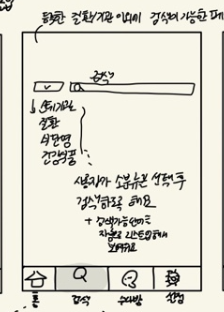
< 검색 페이지에서, 유저가 신체기관 입력 -> 건강기능식품 추천 제품명 리스팅 시스템 > 

* 사용될 DB데이블)  <br>
[01신체기능별정보및추천원료] <br>
"신체기관" | 정보 | "개별인정형기능성원료" | 고시형기능성원료 <br>
[03품목제조신고사항현황_건강기능식품] <br>
허가번호 | 제품명 | 제품타입 | "제품분류" | "효능" | 복용법 | 주의사항 <br>
<br>
* 최종 목표) 유저가 '신체기관'(ex.간) 입력 시, 해당 기관에 도움이 되는 효능과 원료를 가진 제품명을 추천 <br>
<br>
* 구현 프로세스) <br>
1) [03]에 "Score"열 생성.  <br>
2) 유저 인풋과 -> [01]"신체기관"열과 매칭 -> 다시 [03]"효능"열과 매칭 -> 매칭되는 결과가 있을 때마다 Score 1점씩 추가 <br>
3) 모든 아이템의 최종 Score중 가장 높은 Score를 가진 아이템 최대 20개 출력 <br>

In [ ]:
*****heart열 생성 전 csv 파일은 없습니다 ㅠㅠㅠ

In [156]:
# 'heart'열 생성 코드
temp_heart = list(range(30799))
temp_heart = [0 for x in temp_heart]
df03['heart'] = temp_heart

for user_heart_record in hearts['건강기능식품하트기록']:
    for item_index in eval(user_heart_record):
        df03['heart'][item_index] += 1
        
df03.to_csv('03(heart열추가)건강기능식품 품목제조 신고사항 현황_건강기능식품 종류 및 효능.csv')

NameError: name 'hearts' is not defined

In [161]:
df03 = pd.read_csv('03(heart열ID열추가)건강기능식품 품목제조 신고사항 현황_건강기능식품 종류 및 효능 - Copy.csv',index_col='Unnamed: 0')
df03.head(2)

,itemID,허가번호,제품명,제조회사,제품타입,제품분류,유통기한,효능,복용법,주의사항,어린이 기호식품,heart
0,0,2.004002e+10,해피트루 포스트 바이오틱스,(주)알피바이오,"고유의 향미가 있고 이미, 이취가 없는 진한 노랑색 알갱이가 있는 하양색 분말","프로바이오틱스, 프락토올리고당, 아연, 비오틴",제조일로부터 18개월,[프락토올리고당] ①장내 유익균 증식 및 배변활동 원활에 도움을 줄 수 있음\n\n...,"1일 1회, 1회 1포를 충분한 물과 함께 섭취하십시오.","[프락토올리고당]\n (가) 섭취 시 가스참, 트림, 복통, 복부팽만감 등이 발생할...",항목없음,2
1,1,2.015001e+10,클린차전자피분말,푸른바이오에스,"이미, 이취가 없고 고유의 향미가 있는 밝은 회황색의 분말",차전자피식이섬유,제조일로부터 24개월까지,[차전자피식이섬유] 혈중 콜레스테롤 개선·배변활동 원활에 도움을 줄 수 있음,건강기능식품 원료로 사용,반드시 충분한 물과 함께 섭취할 것 (액상제외),항목없음,2


In [167]:
# df01 데이터프레임 불러오는 코드 
df01 = pd.read_csv('01el_for_organ.csv',encoding='utf-8',index_col='Unnamed: 0')
# df01['신체기능/기관'] = df01['신체기능/기관'].str.strip()
# set(df01['신체기능/기관'])

In [169]:
# 각 신체 기관별 Score열 생성
# 해당 기관에 효과있는 원료를 포함한 경우 Score 부여 코드

for organ in list(df01['신체기능/기관']):
    column_str = 'Score_{}'.format(organ)
    
    temp_score = list(range(30799))
    temp_score = [0 for x in temp_score]
    df03[column_str] = temp_score

    # 유저에게 관심있는 신체기능/기관을 인풋으로 받아 
    input_organs = organ

    # 입력된 신체기능에 도움을 주는 원료들을 포함하는 아이템의 Score열에 점수 부여 
    index_input_organs = df01.loc[df01['신체기능/기관'] == input_organs].index[0] # input_organs의 df01내 index 번호. 다음 라인에서 사용. 
    elements_for_organs = df01.loc[df01['신체기능/기관'] == input_organs]['개별인정형기능성원료'][index_input_organs] # 특정 신체 기능에 도움을 주는 원료 리스트

    for element_str in elements_for_organs:
        for row_idx, product_elements_str in enumerate(df03['제품분류']): # 아이템별 들어간 원료
            if element_str in product_elements_str.split(','):
                df03[column_str].iloc[row_idx] += 1

        # 입력된 신체기능을 개선해주는 효능을 가진 아이템의 Score열에 점수 부여 
    for num, item_function in enumerate(df03['효능']):
        if input_organs in item_function:
            df03[column_str][num] += 1
    # print("✅도출된 최종 합산점수(원료+기능)의 value를 count")
    value_counts_df = df03[column_str].value_counts()
    print(value_counts_df)

In [23]:
df03 = df03.drop(columns=['허가번호','제품타입','유통기한','어린이 기호식품']) # 필요한 열만 빼오기

In [24]:
df03.to_csv('검색페이지_관심기능별아이템Score.csv') # csv 파일로 저장

In [170]:
df03 = pd.read_csv('검색페이지_관심기능별아이템Score.csv',index_col="Unnamed: 0")

In [171]:
df03.head()

,itemID,제품명,제조회사,제품분류,효능,복용법,주의사항,heart,Score_장,Score_혈당조절,...,Score_과민피부상태,Score_배뇨기능,Score_위,Score_정자운동성,Score_질,Score_월경전변화,Score_어린이키성장,Score_수면질,Score_근력,신체기능
0,0,해피트루 포스트 바이오틱스,(주)알피바이오,"프로바이오틱스, 프락토올리고당, 아연, 비오틴",[프락토올리고당] ①장내 유익균 증식 및 배변활동 원활에 도움을 줄 수 있음\n\n...,"1일 1회, 1회 1포를 충분한 물과 함께 섭취하십시오.","[프락토올리고당]\n (가) 섭취 시 가스참, 트림, 복통, 복부팽만감 등이 발생할...",2,1,0,...,0,0,0,0,1,0,0,0,0,"['장', '질']"
1,1,클린차전자피분말,푸른바이오에스,차전자피식이섬유,[차전자피식이섬유] 혈중 콜레스테롤 개선·배변활동 원활에 도움을 줄 수 있음,건강기능식품 원료로 사용,반드시 충분한 물과 함께 섭취할 것 (액상제외),2,0,0,...,0,0,0,0,0,0,0,0,0,['콜레스테롤']
2,2,전홍삼,김포파주인삼농업협동조합,홍삼,[홍삼] 면역력 증진·피로개선·혈소판 응집억제를 통한 혈액흐름·기억력 개선·항산화에...,"1일 1회, 1회 3g(1스푼)을 온수에 타거나 직접 섭취하십시오.","의약품(당뇨치료제, 혈액항응고제) 복용 시 섭취에 주의하십시오\n특이체질 및 알레르...",0,0,0,...,0,0,0,0,0,0,0,0,0,"['기억력', '피로']"
3,3,알티지 오메가3 더블,(주)알피바이오,"EPA 및 DHA 함유 유지, 비타민 E",[EPA 및 DHA 함유 유지] 혈중 중성지질 개선·혈행 개선·건조한 눈을 개선하여...,"1일 1회, 1회 2캡슐 또는 1일 2회, 1회 1캡슐을 충분한 물과 함께 섭취하십시오.","(가) 의약품(항응고제, 항혈소판제, 혈압강하제 등) 복용 시 전문가와 상담할 것\...",0,0,0,...,0,0,0,0,1,0,0,0,0,"['혈행', '눈', '질']"
4,4,아크 어써라이즈 코엔자임Q10 100mg,(주)알피바이오,코엔자임Q10,[코엔자임Q10] 항산화․높은 혈압 감소에 도움을 줄 수 있음,"1일 1회, 1회 1캡슐을 충분한 물과 함께 섭취하십시오.",항목없음,1,0,0,...,0,0,0,0,0,0,0,0,0,['결과없음']


df03에 신체기능열 추가하는 코드

In [ ]:
# df01 데이터프레임 불러오는 코드 
df01 = pd.read_csv('01el_for_organ.csv',encoding='utf-8',index_col='Unnamed: 0')

In [75]:
for num in list(range(30799)):
    series_row = df03.loc[num][list_organ].astype(int)
    max_value = max(series_row.values)
    if max_value > 0: 
        organs = []
        for x in (list(series_row[series_row.values == max_value].index)):
            organs.append(x.replace('Score_',''))
    else:
        organs = ['결과없음']
#     print(organs)
    df03['신체기능'][num]  = organs

기능명 입력시 가장 Score높은 아이템 50개를 반환해주는 코드

In [66]:
# 신체기관 입력시 Score높은 순으로 아이템을 반환하는 코드 
def searchpage_inputOrgans():
    input_organs = str(input("관심있는 신체기능/기관을 입력해주세요: "))
    col_name = "Score_{}".format(input_organs)
    df_result = df03.sort_values(by=col_name,ascending=False).iloc[:50] # top 50개 추출
    return df_result

# # 좋아요 순으로 정렬하기
# def searchpage_inputOrgans_by_like():
#     df_result = searchpage_inputOrgans()
#     df_result_by_like = df_result.sort_values(by='heart',ascending=False)
#     return df_result_by_like

In [69]:
searchpage_inputOrgans()
# searchpage_inputOrgans_by_like()

관심있는 신체기능/기관을 입력해주세요: 장


,itemID,제품명,제품분류,효능,복용법,주의사항,heart,Score_장,Score_혈당조절,Score_관절 뼈,...,Score_갱년기 여성,Score_과민피부상태,Score_배뇨기능,Score_위,Score_정자운동성,Score_질,Score_월경전변화,Score_어린이키성장,Score_수면질,Score_근력
26394,26394,장편한 자일로엔,자일로올리고당(xylooligosaccharide) 분말,"[자일로올리고당(xylooligosaccharide) 분말]“장내 유익균 증식, 유...","1일 2회, 1회 1포를 물과 함께 섭취.",[자일로올리고당(xylooligosaccharide) 분말]과량으로 섭취 시 설사를...,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
22428,22428,자일로올리고스위트+,자일로올리고당(xylooligosaccharide) 분말,"[자일로올리고당(xylooligosaccharide) 분말]“장내 유익균 증식, 유...","1일 1회, 1회 1포(1포 당 5 g)를 물에 타서 섭취하십시오.","① 유통기한을 확인하시기 바라며, 섭취량 및 섭취방법을 준수하시기 바랍니다. \r\...",2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,해피트루 포스트 바이오틱스,"프로바이오틱스, 프락토올리고당, 아연, 비오틴",[프락토올리고당] ①장내 유익균 증식 및 배변활동 원활에 도움을 줄 수 있음\n\n...,"1일 1회, 1회 1포를 충분한 물과 함께 섭취하십시오.","[프락토올리고당]\n (가) 섭취 시 가스참, 트림, 복통, 복부팽만감 등이 발생할...",2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5987,5987,프리미엄 멀티비타민,"칼슘, 비타민E, 비타민 C, 셀레늄(또는 셀렌), 비타민 B12, 몰리브덴, 나이...",[칼슘] ① 뼈와 치아 형성에 필요 ② 신경과 근육 기능 유지에 필요 ③ 정상적인 ...,"1일 1회, 1회 2정을 물과 함께 섭취하십시오.",① 알레르기 체질이신 경우 성분을 확인한 후 섭취여부를 결정하여야 함\n[비타민D]...,3,1,0,0,...,0,0,0,1,0,1,0,0,0,0
6008,6008,브링 포스트바이오틱스,"아연, 프락토올리고당, 프로바이오틱스",유산균 증식 및 유해균 억제·배변활동 원활에 도움을 줄 수 있음\n\n①장내 유익균...,"1일 1회, 1회 1포를 직접 섭취하거나 물과 함께 섭취하십시오.",(가) 질환이 있거나 의약품 복용 시 전문가와 상담할 것 (나) 알레르기 체질 등은...,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26537,26537,멀티비타민,"비타민E, 비타민D, 비타민C, 비타민B2, 비타민A",[비타민A]①어두운 곳에서 시각 적응을 위해 필요②피부와 점막을 형성하고 기능을 유...,"1일 2회, 1회 2정을 씹어서 섭취하십시오.",1) 특이체질 및 알러지 체질의 경우 성분을 확인한 후 섭취하십시오.\r\n2) 동...,2,1,0,0,...,0,0,0,1,0,0,0,0,0,0
13586,13586,닥터멀티비타민 M,"마그네슘, 비타민 C, 셀레늄(또는 셀렌), 비타민E, 철, 크롬, 나이아신, 아연...",①에너지 이용에 필요②신경과 근육 기능 유지에 필요\n\n①결합조직 형성과 기능유지...,"1일 2회, 1회 1정씩 물과 함께 섭취하십시오.",1) 유통기한이 경과된 제품은 섭취하지 마시기 바랍니다.\n2) 제품 개봉 후에는 ...,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
6001,6001,알티지 레드 오메가3,"비타민E, 비타민D, 비타민A, EPA 및 DHA 함유 유지",1) EPA 및 DHA 함유 유지 : 혈중 중성지질 개선·혈행 개선·기억력 개선·건...,"1일 1회, 1회 2캡슐을 충분한 물과 함께 섭취하십시오.1일 2회, 1회 1캡슐을...",섭취 시 목에 걸릴 수 있으므로 반드시 물과 함께 섭취하십시오. \n섭취 시 위장장...,4,1,0,0,...,0,0,0,1,0,1,0,0,0,0
13591,13591,닥터멀티비타민 W,"비타민 B12, 엽산, 비타민K, 비타민 B2, 비타민 B1, 비타민 B6, 비타민...",①결합조직 형성과 기능유지에 필요②철의 흡수에 필요③항산화 작용을 하여 유해산소로부...,"1일 2회, 1회 1정씩 물과 함께 섭취하십시오.",1) 유통기한이 경과된 제품은 섭취하지 마시기 바랍니다.\n2) 제품 개봉 후에는 ...,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
5996,5996,웰리카 다이어트 플러스 프로바이오틱스,"프로바이오틱스, 가르시니아캄보지아 추출물",유산균 증식 및 유해균 억제·배변 활동 원활·장 건강에 도움을 줄 수 있음\n\n①...,"1일 1회, 1회 1포를 직접 섭취하거나 물과 함께 섭취하십시오.",(가) 질환이 있거나 의약품 복용 시 전문가와 상담할 것 (나) 알레르기 체질 등은...,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
